# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'>공공데이터 활용<font>

### Case1. 30년이상 노후화된 공공시설물현황(공동주택제외)
>  
- [공공시설물] 한국시설안전공단 30년이상 노후화된 공공시설물현황
- https://www.data.go.kr/dataset/15017291/fileData.do

In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]
%matplotlib inline

In [2]:
df = pd.read_csv('data/public_old_buildings_20171016.csv', encoding='EUC-KR')
df.head(10)

,시설물명,시설물구분,시설물소재지,준공일자
0,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동,19860510
1,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동,19801231
2,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동,19791231
3,사당천복개구조물,교량,서울특별시 서초구 방배동,19801231
4,반포천복개구조물,교량,서울특별시 서초구 서초동,19820929
5,두구교(구),교량,부산광역시 금정구 두구동,19660725
6,진해1부두,항만,경상남도 창원시 진해구 행암동,19700929
7,호형정수장,상하수도,전라남도 고흥군 고흥읍,19820101
8,금사정수장,상하수도,전라남도 고흥군 포두면,19790101
9,신호정수장,상하수도,전라남도 고흥군 도화면,19850101


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243 entries, 0 to 3242
Data columns (total 4 columns):
시설물명      3243 non-null object
시설물구분     3243 non-null object
시설물소재지    3243 non-null object
준공일자      3243 non-null int64
dtypes: int64(1), object(3)
memory usage: 101.4+ KB


#### <font color='blue'> # 준공일자 기준으로 정렬 </font>

In [4]:
df.sort_values(by='준공일자', ascending=1).tail(10)

,시설물명,시설물구분,시설물소재지,준공일자
1978,송촌정수장,상하수도,대전광역시 대덕구 송촌동,19870930
1858,비전2배수지,상하수도,경기도 평택시 매봉산4길,19871001
2167,염포배수지,상하수도,울산광역시 북구 염포동,19871001
2169,전하배수지,상하수도,울산광역시 동구 봉수로,19871001
2165,무거배수지,상하수도,울산광역시 남구 무거동,19871001
2168,성남배수지,상하수도,울산광역시 중구 북부순환도로,19871001
1561,강진읍 상수도,상하수도,전라남도 강진군 강진읍,19871002
1838,팔마주경기장,건축물,전라남도 순천시 팔마로,19871002
2224,광주종합체육관,건축물,광주광역시 서구 화정동,19871005
270,순지교,교량,전라남도 장흥군 장흥읍,19871015


In [5]:
df.columns

Index(['시설물명', '시설물구분', '시설물소재지', '준공일자'], dtype='object')

In [6]:
type(df['준공일자'][0])

numpy.int64

In [7]:
from datetime import datetime

#### <font color='blue'> # 문자열인 준공일자를 Date 객체로 변환 </font>

In [8]:
df['준공일자'] = pd.to_datetime(df['준공일자'], format='%Y%m%d') 
df.head(10)

,시설물명,시설물구분,시설물소재지,준공일자
0,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동,1986-05-10
1,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1980-12-31
2,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1979-12-31
3,사당천복개구조물,교량,서울특별시 서초구 방배동,1980-12-31
4,반포천복개구조물,교량,서울특별시 서초구 서초동,1982-09-29
5,두구교(구),교량,부산광역시 금정구 두구동,1966-07-25
6,진해1부두,항만,경상남도 창원시 진해구 행암동,1970-09-29
7,호형정수장,상하수도,전라남도 고흥군 고흥읍,1982-01-01
8,금사정수장,상하수도,전라남도 고흥군 포두면,1979-01-01
9,신호정수장,상하수도,전라남도 고흥군 도화면,1985-01-01


#### <font color='blue'> # 준공일자 칼럼을 인덱스로 지정 </font>

In [9]:
df.set_index('준공일자', inplace=True)           
df.head(10)

,시설물명,시설물구분,시설물소재지
준공일자,,,
1986-05-10,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동
1980-12-31,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동
1979-12-31,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동
1980-12-31,사당천복개구조물,교량,서울특별시 서초구 방배동
1982-09-29,반포천복개구조물,교량,서울특별시 서초구 서초동
1966-07-25,두구교(구),교량,부산광역시 금정구 두구동
1970-09-29,진해1부두,항만,경상남도 창원시 진해구 행암동
1982-01-01,호형정수장,상하수도,전라남도 고흥군 고흥읍
1979-01-01,금사정수장,상하수도,전라남도 고흥군 포두면


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3243 entries, 1986-05-10 to 1979-08-20
Data columns (total 3 columns):
시설물명      3243 non-null object
시설물구분     3243 non-null object
시설물소재지    3243 non-null object
dtypes: object(3)
memory usage: 101.3+ KB


#### <font color='blue'> # 준공일자 인덱스로부터 준공년 컬럼 추가 </font>

In [11]:
df.index.year

Int64Index([1986, 1980, 1979, 1980, 1982, 1966, 1970, 1982, 1979, 1985,
            ...
            1985, 1979, 1987, 1984, 1984, 1984, 1984, 1982, 1986, 1979],
           dtype='int64', name='준공일자', length=3243)

In [12]:
df['준공년'] = df.index.year
df.head(10)

,시설물명,시설물구분,시설물소재지,준공년
준공일자,,,,
1986-05-10,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동,1986
1980-12-31,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1980
1979-12-31,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1979
1980-12-31,사당천복개구조물,교량,서울특별시 서초구 방배동,1980
1982-09-29,반포천복개구조물,교량,서울특별시 서초구 서초동,1982
1966-07-25,두구교(구),교량,부산광역시 금정구 두구동,1966
1970-09-29,진해1부두,항만,경상남도 창원시 진해구 행암동,1970
1982-01-01,호형정수장,상하수도,전라남도 고흥군 고흥읍,1982
1979-01-01,금사정수장,상하수도,전라남도 고흥군 포두면,1979


#### <font color='blue'> # 연도별 준공건수 </font>

In [13]:
df_year = df['준공년'].value_counts()
df_year.head(10)

1985    338
1984    269
1986    233
1983    196
1980    188
1987    167
1982    130
1981    128
1979    128
1977     92
Name: 준공년, dtype: int64

In [14]:
df_year.index

Int64Index([1985, 1984, 1986, 1983, 1980, 1987, 1982, 1981, 1979, 1977, 1970,
            1978, 1973, 1975, 1974, 1976, 1969, 1971, 1972, 1963, 1965, 1961,
            1964, 1968, 1955, 1962, 1966, 1945, 1967, 1959, 1960, 1958, 1940,
            1939, 1942, 1938, 1930, 1934, 1937, 1954, 1932, 1957, 1936, 1931,
            1935, 1900, 1944, 1926, 1956, 1914, 1922, 1924, 1949, 1953, 1947,
            1906, 1925, 1943, 1950, 1946, 1929, 1921, 1933, 1923, 1928, 1920,
            1912, 1905, 1941, 1952, 1918, 1951, 1911, 1919, 1915, 1948, 1927],
           dtype='int64')

In [15]:
plt.rcParams["figure.figsize"] = [20,12]

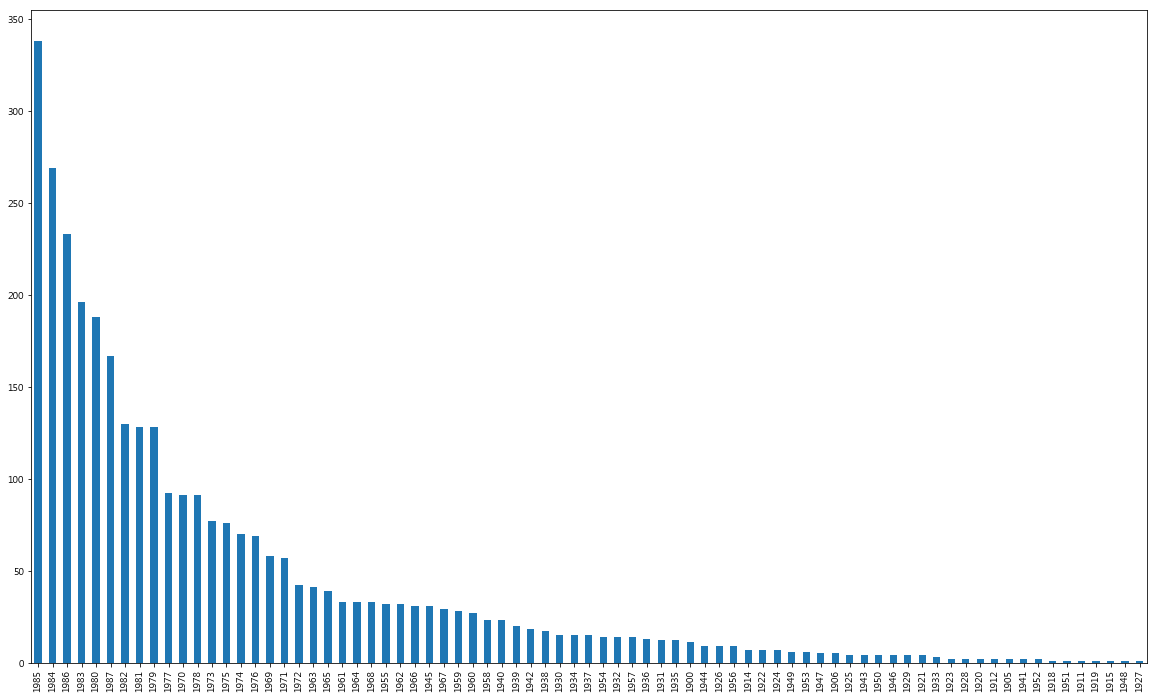

In [16]:
df_year.plot(kind='bar')

#### <font color='blue'> # 연도별로 정렬 </font>

In [17]:
df_year = df_year.sort_index()
df_year.head(10)

1900    11
1905     2
1906     5
1911     1
1912     2
1914     7
1915     1
1918     1
1919     1
1920     2
Name: 준공년, dtype: int64

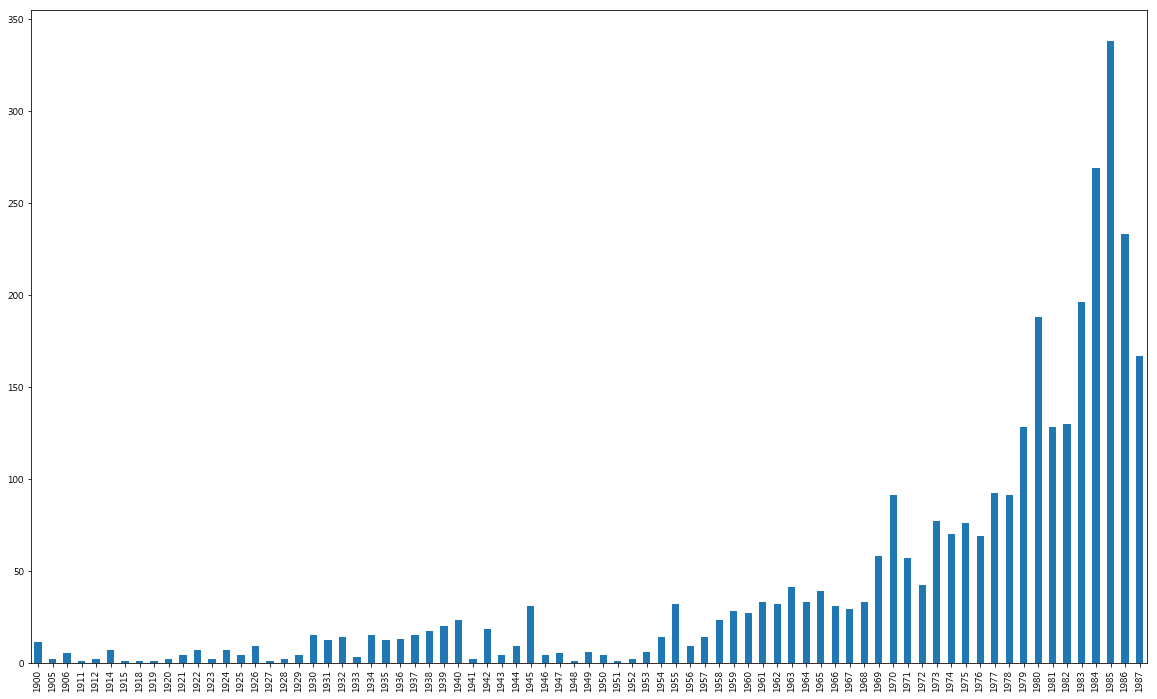

In [18]:
df_year.plot(kind='bar')

In [19]:
df.head()

,시설물명,시설물구분,시설물소재지,준공년
준공일자,,,,
1986-05-10,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동,1986
1980-12-31,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1980
1979-12-31,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1979
1980-12-31,사당천복개구조물,교량,서울특별시 서초구 방배동,1980
1982-09-29,반포천복개구조물,교량,서울특별시 서초구 서초동,1982


In [20]:
df['시설물소재지'].values[100]

'경기도 가평군 외서면'

In [21]:
tmp = '부산광역시 부산진구 부암동'

In [22]:
tmp.find(' ')

5

In [23]:
tmp2 = tmp[0:(tmp.find(' '))]

In [24]:
tmp2

'부산광역시'

In [25]:
len(df)

3243

In [26]:
df['시설물소재지'].values[1][0:5]

'부산광역시'

In [27]:
tmp3 = df['시설물소재지'].values[1].find(' ')

In [28]:
df['시설물소재지'].values[1][0:tmp3]

'부산광역시'

In [29]:
df['state'] = ' '
df.head(5)

,시설물명,시설물구분,시설물소재지,준공년,state
준공일자,,,,,
1986-05-10,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동,1986,
1980-12-31,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1980,
1979-12-31,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1979,
1980-12-31,사당천복개구조물,교량,서울특별시 서초구 방배동,1980,
1982-09-29,반포천복개구조물,교량,서울특별시 서초구 서초동,1982,


#### <font color='blue'> # 시설물소재지를 시/도별로 구분하는 state 컬럼 추가 </font>

In [30]:
for n in np.arange(len(df)):
    endN = df['시설물소재지'].values[n].find(' ')
    df['state'].values[n] = df['시설물소재지'].values[n][0:endN]

In [31]:
df.head(10)

,시설물명,시설물구분,시설물소재지,준공년,state
준공일자,,,,,
1986-05-10,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동,1986,부산광역시
1980-12-31,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1980,부산광역시
1979-12-31,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1979,부산광역시
1980-12-31,사당천복개구조물,교량,서울특별시 서초구 방배동,1980,서울특별시
1982-09-29,반포천복개구조물,교량,서울특별시 서초구 서초동,1982,서울특별시
1966-07-25,두구교(구),교량,부산광역시 금정구 두구동,1966,부산광역시
1970-09-29,진해1부두,항만,경상남도 창원시 진해구 행암동,1970,경상남도
1982-01-01,호형정수장,상하수도,전라남도 고흥군 고흥읍,1982,전라남도
1979-01-01,금사정수장,상하수도,전라남도 고흥군 포두면,1979,전라남도


#### <font color='blue'> # 제대로 잘 잘렸는지, unique()를 통해서 확인한다. </font>

In [32]:
df['state'].unique()

array(['부산광역시', '서울특별시', '경상남도', '전라남도', '대구광역시', '전라북도', '인천광역시', '충청북도',
       '강원도', '제주특별자치도', '경기도', '충청남도', '광주광역시', '경상북도', '대전광역시',
       '세종특별자치시', '울산광역시'], dtype=object)

#### <font color='blue'> # 시/도별 준공건수 </font>

In [33]:
df_state = df['state'].value_counts()
df_state

서울특별시      609
경상북도       454
경상남도       369
강원도        244
경기도        213
전라남도       210
충청북도       204
충청남도       203
전라북도       187
부산광역시      160
대구광역시      105
광주광역시       92
대전광역시       59
인천광역시       55
울산광역시       53
세종특별자치시     14
제주특별자치도     12
Name: state, dtype: int64

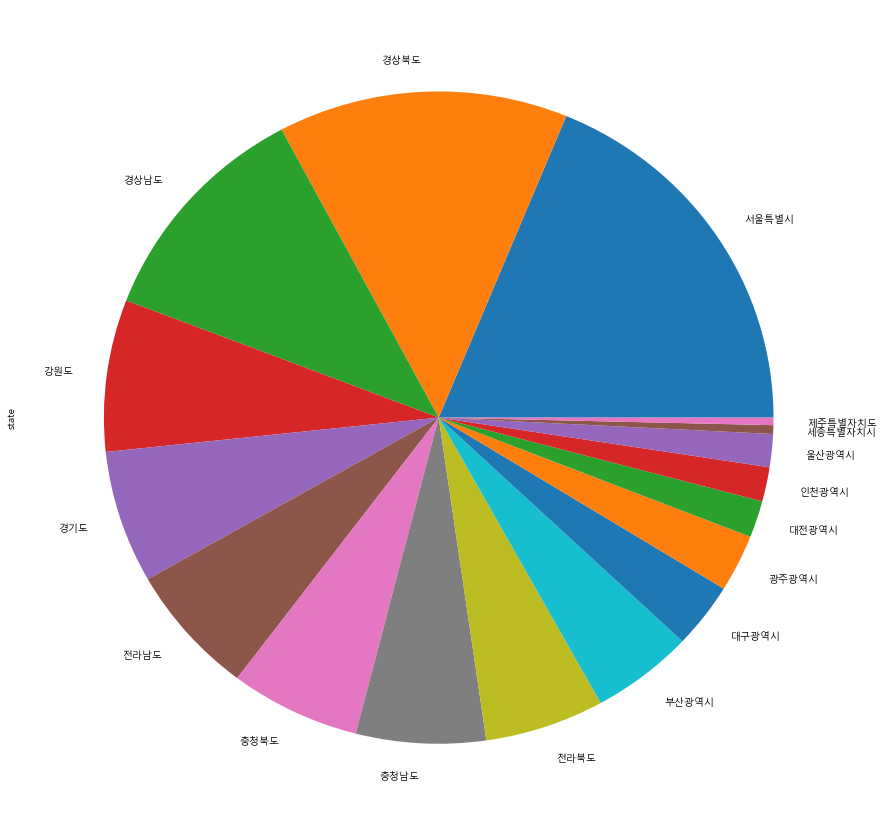

In [34]:
plt.rcParams["figure.figsize"] = [15,15]
df_state.plot(kind='pie')
plt.show()

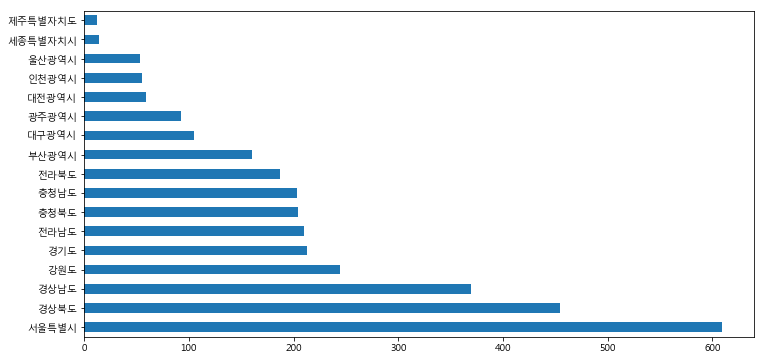

In [35]:
plt.rcParams["figure.figsize"] = [12,6]
df_state.plot(kind='barh')
plt.show()

#### <font color='blue'> # 내림차순 정렬 </font>

In [36]:
df_state.sort_values(ascending=False).head(5)

서울특별시    609
경상북도     454
경상남도     369
강원도      244
경기도      213
Name: state, dtype: int64

#### <font color='blue'> # 오름차순 정렬 </font>

In [37]:
df_state.sort_values(ascending=True).head(5)

제주특별자치도    12
세종특별자치시    14
울산광역시      53
인천광역시      55
대전광역시      59
Name: state, dtype: int64

#### <font color='blue'> # 30년이상 노후화된 공공시설물 현황 </font>

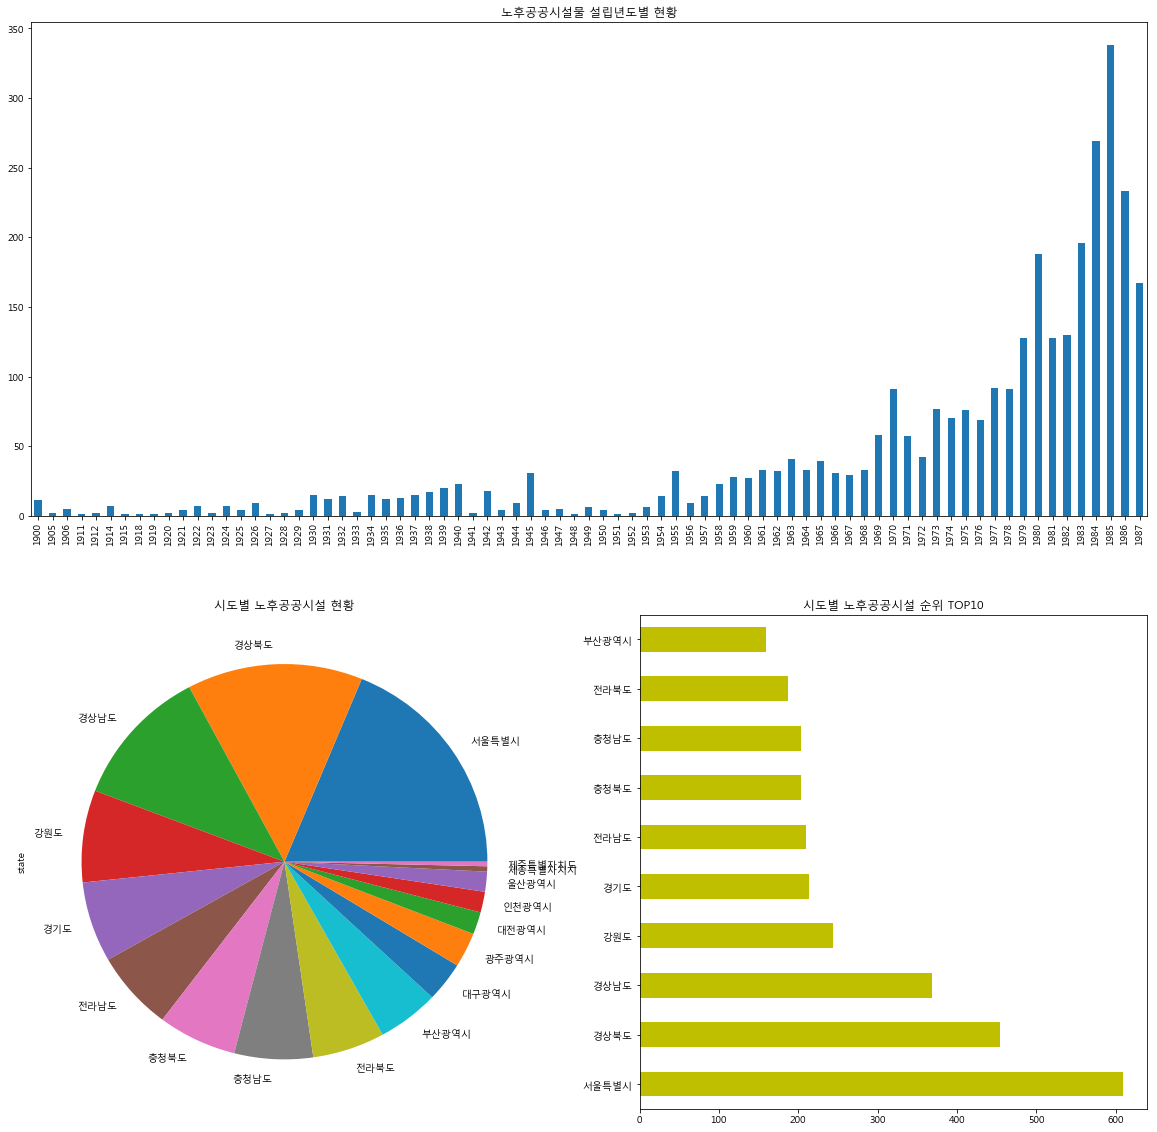

In [38]:
plt.figure(figsize=(20,20))

plt.subplot(211) 
plt.title('노후공공시설물 설립년도별 현황')
df_year.plot(kind='bar')

plt.subplot(223) 
plt.title("시도별 노후공공시설 현황")
df_state.plot(kind='pie')

plt.subplot(224)
plt.title("시도별 노후공공시설 순위 TOP10")
df_state.sort_values(ascending=False).head(10).plot(kind='barh', color='y')

plt.show()


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>